# Analisis Tecnico de Acciones con Python
#### Este script utiliza la librería yfinance para descargar datos de acciones y realizar análisis técnico.

In [1]:
!pip install --upgrade pip setuptools wheel

  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\epere\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\epere\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip setuptools wheel


In [2]:
!pip install numpy Cython scikit-learn statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\epere\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [9]:
pip install --upgrade pip

  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
pip install ta


  Using cached ta-0.11.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install lxml

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.0 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.0 MB 2.4 MB/s eta 0:00:02
   ------------- -------------------------- 1.3/4.0 MB 2.2 MB/s eta 0:00:02
   --------------- ------------------------ 1.6/4.0 MB 2.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.8/4.0 MB 2.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.8/4.0 MB 2.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.8/4.0 MB 2.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.8/4.0 MB 2.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.8/4.0 MB 2.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.8/4.0 MB 2.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.8/4.0 MB 2.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.8/4.0 MB 2.1 MB/s eta 0:00:02
   -------------------- --


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from ta.momentum import RSIIndicator
from ta.trend import MACD
from datetime import timedelta
from scipy.stats import norm
import numpy as np


In [4]:
import yfinance as yf
import pandas as pd

def top_20_sp500_volume():
    url_sp500 = 'https://datahub.io/core/s-and-p-500-companies/r/0.csv'
    df_sp500 = pd.read_csv(url_sp500)
    print(df_sp500.head())
    tickers = df_sp500['Symbol'].tolist()
    data = yf.download(tickers, period='2d', interval='1d', group_by='ticker', threads=True, progress=False)

    volumenes = []
    for ticker in tickers:
        try:
            volumen_ultimo = data[ticker]['Volume'][-1]
            nombre = df_sp500.loc[df_sp500['Symbol'] == ticker, 'Name'].values[0]
            volumenes.append({'Ticker': ticker, 'Nombre': nombre, 'Volumen': volumen_ultimo})
        except:
            pass

    df_volumen = pd.DataFrame(volumenes)
    df_volumen = df_volumen.sort_values(by='Volumen', ascending=False).head(20)
    df_volumen['Inicial'] = df_volumen['Nombre'].str[0]
    print(df_volumen[['Inicial', 'Nombre', 'Ticker', 'Volumen']])

top_20_sp500_volume()


  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  



3 Failed downloads:
['BRK.B']: YFPricesMissingError('possibly delisted; no price data found  (period=2d) (Yahoo error = "No data found, symbol may be delisted")')
['BF.B', 'WBA']: YFPricesMissingError('possibly delisted; no price data found  (period=2d)')


KeyError: 'Volumen'

## TOP 20 ACCIONES CON MAYOR VOLUMNE EN S&P 500

In [1]:
import warnings
import yfinance as yf
import pandas as pd
from IPython.display import display

# Ocultar FutureWarnings molestos
warnings.simplefilter(action='ignore', category=FutureWarning)

# URL de Wikipedia con los componentes del S&P 500
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Leer la tabla
tabla = pd.read_html(url)[0]

# Extraer símbolos y nombres
tickers = tabla['Symbol'].str.replace('.', '-', regex=False).tolist()
nombres = tabla['Security'].tolist()

# Descargar datos de 2 días para todos los tickers a la vez
data = yf.download(tickers, period='2d', interval='1d', group_by='ticker', threads=True, progress=False)

resultados = []

for ticker, nombre in zip(tickers, nombres):
    try:
        cierre = data[ticker]['Close'].iloc[-1]
        volumen = data[ticker]['Volume'].iloc[-1]
        resultados.append({
            'Nombre': nombre,
            'Ticker': ticker,
            'Volumen': volumen,
            'Precio de Cierre': cierre
        })
    except Exception as e:
        print(f'Error con {ticker}: {e}')

# Crear y mostrar DataFrame ordenado por volumen
df = pd.DataFrame(resultados)
df = df.sort_values(by='Volumen', ascending=False).head(20)
df.reset_index(drop=True, inplace=True)

display(df[['Ticker','Nombre', 'Volumen', 'Precio de Cierre']])

HTTPError: HTTP Error 403: Forbidden

## TOP 20 ACCIONES CON MAYOR VOLUMNE EN NASDAQ

In [11]:

# === CONFIGURACIÓN ===
ticker = "AAPL"  # Cambiá acá para otra acción
start_date = "2024-08-01"
end_date = "2025-09-05"
forecast_months = 5
target_price = 230

# === DATOS HISTÓRICOS ===
df = yf.download(ticker, start=start_date, end=end_date)
df = df[['Close']].dropna()

# === INDICADORES TÉCNICOS ===
df['RSI'] = RSIIndicator(close=df['Close'].squeeze()).rsi()

macd = MACD(close=df['Close'].squeeze())
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()


# Si las columnas son un MultiIndex, las aplanamos
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

#Borrar el Price de Cierre
df.columns.name = None

# Si 'Date' está como índice, lo pasamos a columna
df = df.reset_index()

# Asegurarnos que 'Date' esté en formato datetime (por si lo necesitás para predicciones)
df.set_index('Date', inplace=True)

# print(df.head(3000))
display(df.head(3000))

[*********************100%***********************]  1 of 1 completed


,Close,RSI,MACD,MACD_signal
Date,,,,
2024-08-01,217.097168,NaN,NaN,NaN
2024-08-02,218.588486,NaN,NaN,NaN
2024-08-05,208.059753,NaN,NaN,NaN
2024-08-06,206.031525,NaN,NaN,NaN
2024-08-07,208.606567,NaN,NaN,NaN
...,...,...,...,...
2025-08-28,232.559998,66.920045,4.877216,4.976806
2025-08-29,232.139999,65.961335,4.849073,4.951260
2025-09-02,229.720001,60.576325,4.578716,4.876751


In [ ]:
pip install ta


  Using cached ta-0.11.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

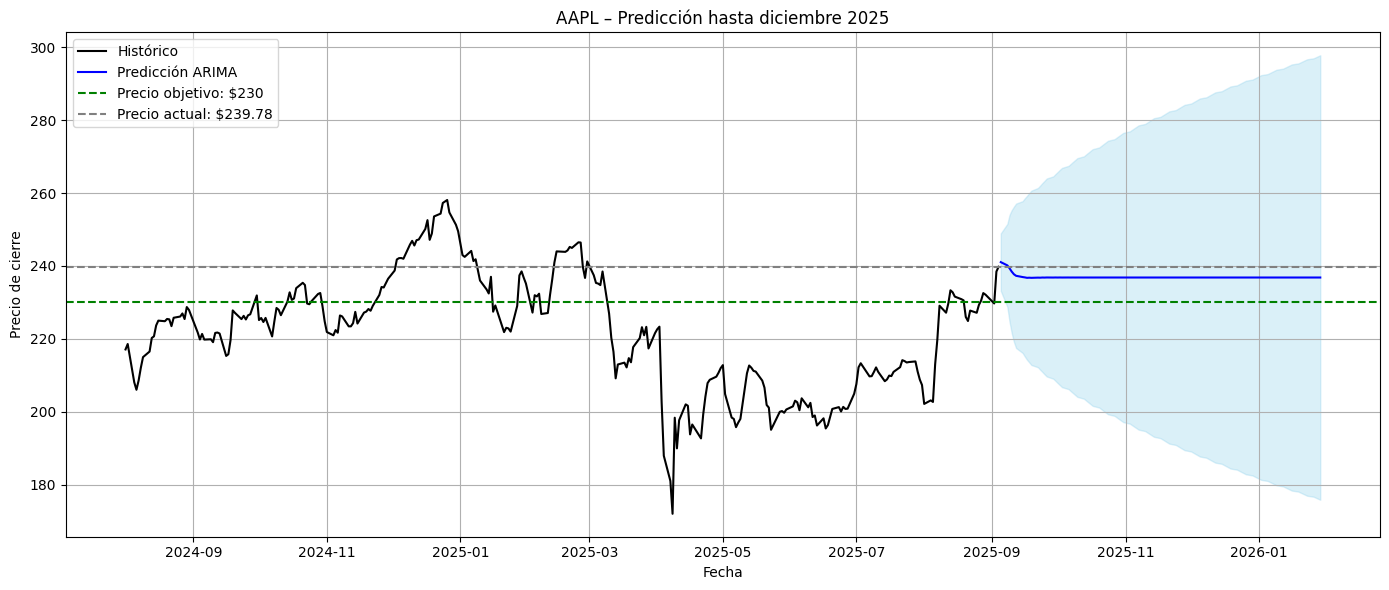

In [12]:
# === MODELO ARIMA SIN pmdarima ===
order = (5, 1, 2)  # Este orden suele ser estable para acciones, ajustable según pruebas
modelo = ARIMA(df['Close'], order=order)
modelo_fit = modelo.fit()

# === PREDICCIÓN ===
n_periods = forecast_months * 21
forecast = modelo_fit.get_forecast(steps=n_periods)
preds = forecast.predicted_mean
conf_int = forecast.conf_int()

# === FECHAS FUTURAS ===
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_periods, freq='B')

# === PROBABILIDAD DE SUPERAR UN PRECIO ===
pred_last_day = preds.iloc[-1]
std_error = (conf_int.iloc[-1, 1] - conf_int.iloc[-1, 0]) / (2 * 1.96)
prob_superar = 1 - norm.cdf(target_price, loc=pred_last_day, scale=std_error)

# === SIMULACIÓN DE INVERSIÓN ===
precio_actual = float(df['Close'].iloc[-1])
precio_esperado = preds.iloc[-1]
ganancia_esperada = precio_esperado - precio_actual
retorno_pct = (ganancia_esperada / precio_actual) * 100

# === GRÁFICO ===
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Histórico', color='black')
plt.plot(forecast_dates, preds, label='Predicción ARIMA', color='blue')
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='skyblue', alpha=0.3)
plt.axhline(target_price, color='green', linestyle='--', label=f'Precio objetivo: ${target_price}')
plt.axhline(precio_actual, color='gray', linestyle='--', label=f'Precio actual: ${precio_actual:.2f}')
plt.title(f'{ticker} – Predicción hasta diciembre 2025')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
# === RESULTADOS ===
print(f"🔹 RSI actual: {df['RSI'].iloc[-1]:.2f}")
print(f"🔹 MACD actual: {df['MACD'].iloc[-1]:.2f}, Señal: {df['MACD_signal'].iloc[-1]:.2f}")
print(f"🔹 Precio actual: ${precio_actual:.2f}")
print(f"🔹 Precio esperado a fin de diciembre: ${precio_esperado:.2f}")
print(f"📈 Ganancia esperada: ${ganancia_esperada:.2f} ({retorno_pct:.2f}%)")
print(f"🎯 Probabilidad de superar ${target_price}: {prob_superar * 100:.2f}%")

# === ESTRATEGIA ===
if df['RSI'].iloc[-1] < 50 and df['MACD'].iloc[-1] > df['MACD_signal'].iloc[-1] and prob_superar > 0.6:
    print("✅ Estrategia: Condiciones favorables. Podés considerar entrar.")
else:
    print("⚠️ Estrategia: Esperá mejores condiciones técnicas o mayor probabilidad.")

🔹 RSI actual: 71.21
🔹 MACD actual: 5.40, Señal: 5.00
🔹 Precio actual: $239.78
🔹 Precio esperado a fin de diciembre: $236.83
📈 Ganancia esperada: $-2.95 (-1.23%)
🎯 Probabilidad de superar $230: 58.69%
⚠️ Estrategia: Esperá mejores condiciones técnicas o mayor probabilidad.
